In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('NEW_EUA.csv') 
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date').reset_index(drop=True)
df.set_index('Date', inplace=True)

In [3]:
# 상관계수가 높은 변수들만 필터링: EUA, Coal, NG, Power
selected_data = df[['EUA', 'Coal', 'NG', 'Power']]

In [4]:
# '2024-03-01'부터 '2024-10-27'까지의 데이터 필터링
data_24 = selected_data.loc['2024-03-01':'2024-10-27']
corr_matrix_24 = data_24.corr()
corr_with_eua_24 = corr_matrix_24['EUA'][['Coal', 'NG', 'Power']]
correlated_features_24 = corr_with_eua_24.abs().sort_values(ascending=False).index.tolist()

In [5]:
# 훈련 데이터 준비
train_data_24 = data_24[['EUA'] + correlated_features_24]
endog_24 = train_data_24['EUA']
exog_24 = train_data_24[correlated_features_24]

In [6]:
# ARIMA 모델 설정 및 훈련
model_24 = ARIMA(endog_24, exog=exog_24, order=(1, 1, 1))
model_fit_24 = model_24.fit()


C:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [8]:
# '2024-10-28'부터 '2024-11-03'까지의 데이터를 이용한 예측
test_data_24 = selected_data.loc['2024-10-28':'2024-11-03']
test_data_exog_24 = test_data_24[correlated_features_24]
test_endog_24 = test_data_24['EUA']

forecast_24 = model_fit_24.predict(start=len(train_data_24), end=len(train_data_24) + len(test_data_exog_24) - 1, exog=test_data_exog_24)

ValueError: Prediction must have `end` after `start`.

In [9]:
# 예측된 7일치 값 출력
print("Forecasted EUA values from 2024-10-28 to 2024-11-03:")
print(forecast_24)

Forecasted EUA values from 2024-10-28 to 2024-11-03:


NameError: name 'forecast_24' is not defined

In [10]:
# 예측 성능 평가
train_pred = model_fit_24.predict(start=0, end=len(train_data_24)-1, exog=exog_24)
train_mse = mean_squared_error(endog_24, train_pred)
train_r2 = r2_score(endog_24, train_pred)

print(f"\nTraining Data Performance:")
print(f"R²: {train_r2:.4f}, MSE: {train_mse:.4f}")


Training Data Performance:
R²: 0.9195, MSE: 1.7469


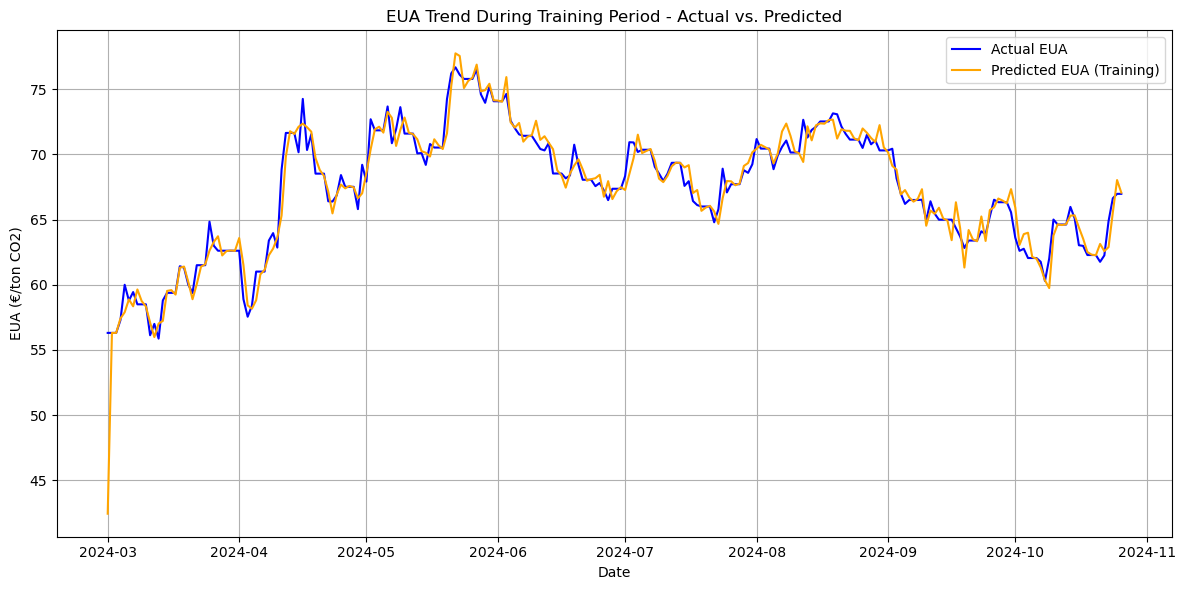

In [11]:
# 트레이닝한 기간 동안의 'EUA' 데이터에 대한 추세 시각화와 훈련 데이터 예측 비교
plt.figure(figsize=(12, 6))
plt.plot(train_data_24.index, endog_24, label="Actual EUA", color="blue")
plt.plot(train_data_24.index, train_pred, label="Predicted EUA (Training)", color="orange")
plt.xlabel('Date')
plt.ylabel('EUA (€/ton CO2)')
plt.title('EUA Trend During Training Period - Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# 예측된 EUA 값 시각화
plt.figure(figsize=(10, 5))
plt.plot(test_data_24.index, forecast_24, label="Forecasted EUA", color="red", marker='o')
plt.xlabel('Date')
plt.ylabel('EUA (€/ton CO2)')
plt.title('Forecasted EUA Values (2024-10-28 to 2024-11-03)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'forecast_24' is not defined

<Figure size 1000x500 with 0 Axes>